## Sberbank Russian Housing Market
##### Group member: Ying Zhang, Zhian Wang

In [1]:
wd = "/Users/zwang/GWU/Kaggle/Housing_Mkt/data"
import pandas as pd
import numpy as np
train_df = pd.read_csv(wd+"/train.csv")
train_df = train_df.reset_index(drop=True)
test_df = pd.read_csv(wd+"/test.csv")
test_df = test_df.reset_index(drop=True)

### Data Preparation

In [2]:
train_df["year"] = pd.to_datetime(train_df["timestamp"], coerce=True).dt.year
train_df["month"] = pd.to_datetime(train_df["timestamp"], coerce=True).dt.month
train_df["day"] = pd.to_datetime(train_df["timestamp"], coerce=True).dt.day
train_df["dayofyear"] = pd.to_datetime(train_df["timestamp"], coerce=True).dt.dayofyear

test_df["year"] = pd.to_datetime(test_df["timestamp"], coerce=True).dt.year
test_df["month"] = pd.to_datetime(test_df["timestamp"], coerce=True).dt.month
test_df["day"] = pd.to_datetime(test_df["timestamp"], coerce=True).dt.day
test_df["dayofyear"] = pd.to_datetime(test_df["timestamp"], coerce=True).dt.dayofyear

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-pac

In [3]:
# Romove the outlier of full_sq
ind = train_df[train_df['full_sq'] > 2000].index
train_df = train_df.drop(ind)

In [4]:
# Remove the outliter in life_sq
ind = train_df[train_df['life_sq'] > 2000].index
train_df = train_df.drop(ind)

In [5]:
# Remove the outliter in kitch_sq
ind = train_df[train_df['kitch_sq'] > 500].index
train_df = train_df.drop(ind)

In [6]:
(train_df['life_sq'] > train_df['full_sq']).sum()
life_sq = train_df['life_sq'].ix[train_df['life_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
train_df['life_sq'].ix[train_df['life_sq'] > train_df['full_sq']] = train_df['full_sq']*life_full
(train_df['life_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [7]:
(test_df['life_sq'] > test_df['full_sq']).sum()
life_sq = test_df['life_sq'].ix[test_df['life_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
test_df['life_sq'].ix[test_df['life_sq'] > test_df['full_sq']] = test_df['full_sq']*life_full
(test_df['life_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [8]:
kitch_sq = train_df['kitch_sq'].ix[train_df['kitch_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
train_df['kitch_sq'].ix[train_df['kitch_sq'] > train_df['full_sq']] = train_df['full_sq']*kitch_full
(train_df['kitch_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [9]:
kitch_sq = test_df['kitch_sq'].ix[test_df['kitch_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
test_df['kitch_sq'].ix[test_df['kitch_sq'] > test_df['full_sq']] = test_df['full_sq']*kitch_full
(test_df['kitch_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [10]:
train_df['floor'].ix[train_df['floor'] > train_df['max_floor']] = train_df['max_floor']*0.5
(train_df['floor'] > train_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [11]:
test_df['floor'].ix[test_df['floor'] > test_df['max_floor']] = test_df['max_floor']*0.5
(test_df['floor'] > test_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [12]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

In [13]:
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])

In [14]:
train_df['rel_floor'] = train_df['floor'] /train_df['max_floor'].astype(float)
train_df['rel_kitch_sq'] = train_df['kitch_sq'] / train_df['full_sq'].astype(float)
train_df['rel_life_sq'] = train_df['life_sq'] / train_df['full_sq'].astype(float)

test_df['rel_floor'] = test_df['floor'] /test_df['max_floor'].astype(float)
test_df['rel_kitch_sq'] = test_df['kitch_sq'] / test_df['full_sq'].astype(float)
test_df['rel_life_sq'] = test_df['life_sq'] / test_df['full_sq'].astype(float)

### Impute Missing Value

In [15]:
train_na = train_df.isnull().sum()
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na_list = train_na.index.tolist()
train_na_list

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_avg_price_500',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'rel_floor',
 'rel_kitch_sq',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'cafe_avg_price_1000',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'rel_life_sq',
 'life_sq',
 'build_count_panel',
 'build_count_before_1920',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_after_1995',
 'build_count_1921-1945',
 'build_count_1971-1995',
 'build_count_1946-1970',
 'cafe_avg_price_1500',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_sum_2000_min_price_avg',
 'cafe_avg_price_2000',
 'cafe_avg_price_3000',
 'cafe_sum_3000_m

In [16]:
train_df = train_df.fillna(train_df.mean())

In [17]:
test_df = test_df.fillna(test_df.mean())

#### Log the price

In [18]:
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### Variable importance

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = train_df.drop(labels=['timestamp', 'id', 'incineration_raion'], axis=1).dropna()
y_train = X_train['price_doc_log']
X_train.drop('price_doc_log', axis=1, inplace=True)
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[f])
        X_train[f] = lbl.transform(X_train[f])
rf = RandomForestRegressor(random_state=0)
rf = rf.fit(X_train, y_train)

In [20]:
fi = list(zip(X_train.columns, rf.feature_importances_))
print('## rf variable importance')
d = [print('## %-40s%s' % (i)) for i in fi[:30]]

## rf variable importance
## full_sq                                 1.53407307586e-08
## life_sq                                 4.34767577988e-09
## floor                                   2.93624072786e-07
## max_floor                               1.57076497458e-08
## material                                8.04179550487e-09
## build_year                              1.86418605279e-06
## num_room                                2.12831524042e-07
## kitch_sq                                3.4202127109e-07
## state                                   3.21240504166e-08
## product_type                            6.05249030829e-09
## sub_area                                1.33966926996e-08
## area_m                                  2.4736040986e-08
## raion_popul                             2.4965033974e-06
## green_zone_part                         3.90024817512e-08
## indust_part                             4.06176249196e-07
## children_preschool                      1.3271328202e-08
##

In [21]:
print(fi[:30])

[('full_sq', 1.5340730758585236e-08), ('life_sq', 4.347675779880679e-09), ('floor', 2.9362407278572317e-07), ('max_floor', 1.570764974581535e-08), ('material', 8.0417955048664453e-09), ('build_year', 1.8641860527888459e-06), ('num_room', 2.1283152404248847e-07), ('kitch_sq', 3.4202127108988602e-07), ('state', 3.2124050416556529e-08), ('product_type', 6.0524903082897139e-09), ('sub_area', 1.3396692699588572e-08), ('area_m', 2.4736040986034181e-08), ('raion_popul', 2.496503397399252e-06), ('green_zone_part', 3.9002481751156949e-08), ('indust_part', 4.0617624919569357e-07), ('children_preschool', 1.3271328201962945e-08), ('preschool_quota', 6.5994259337474961e-08), ('preschool_education_centers_raion', 7.1099883771525288e-09), ('children_school', 2.8879507895056936e-08), ('school_quota', 1.1658478286298456e-08), ('school_education_centers_raion', 7.4715773135753403e-10), ('school_education_centers_top_20_raion', 1.0053517050691346e-09), ('hospital_beds_raion', 9.262607481930407e-10), ('he

In [23]:
[i[0] for i in fi[:30]]

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion']

In [24]:
train_df = train_df.drop('price_doc_log',axis = 1)

In [ ]:
train_df.head(12)

## Model

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import xgboost as xgb
h2o.init() # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd

In [26]:
print(train_df.shape)
print(test_df.shape)

(30464, 299)
(7662, 298)


In [27]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

# bug fix - from Keston
dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'price_doc'
test.columns = cols
print(train.shape)
print(test.shape)

(30464, 299)
(7662, 299)


In [28]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [29]:
original_nums, cats = get_type_lists()

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

In [30]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(21378, 299)
(9086, 299)


### Encode categorical vars using shrunken averages

In [31]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [32]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'price_doc')
    v_enc, ts_enc = target_encoder(valid, test, var, 'price_doc')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: product_type (1/15) ...
Encoding: sub_area (2/15) ...
Encoding: culture_objects_top_25 (3/15) ...
Encoding: thermal_power_plant_raion (4/15) ...
Encoding: incineration_raion (5/15) ...
Encoding: oil_chemistry_raion (6/15) ...
Encoding: radiation_raion (7/15) ...
Encoding: railroad_terminal_raion (8/15) ...
Encoding: big_market_raion (9/15) ...
Encoding: nuclear_reactor_raion (10/15) ...
Encoding: detention_facility_raion (11/15) ...
Encoding: water_1line (12/15) ...
Encoding: big_road1_1line (13/15) ...
Encoding: railroad_1line (14/15) ...
Encoding: ecology (15/15) ...
Done.


In [33]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

### Log the price

price_doc
15.582
15.6073
15.556


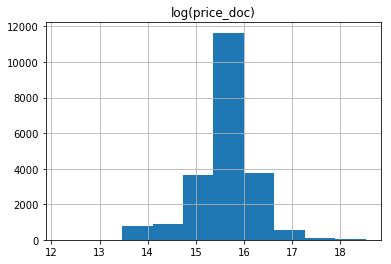

In [34]:
# Check log transform - looks good
%matplotlib inline
train['price_doc'].log().as_data_frame().hist()

# Execute log transform
train['price_doc'] = train['price_doc'].log()
valid['price_doc'] = valid['price_doc'].log()
print(train[0:3, 'price_doc'])
#print(valid[0:3, 'price_doc'])

In [35]:
print(train.shape)
print(valid.shape)
print(test.shape)

(21378, 314)
(9086, 314)
(7662, 314)


#### Define ranked predictions plot function

In [36]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

### Variable importance

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1497744124618_3


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.24956447929627887
RMSE: 0.49956428945259773
MAE: 0.3204704382333566
RMSLE: 0.03085909215680295
Mean Residual Deviance: 0.24956447929627887

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.2680992060867657
RMSE: 0.5177829719938323
MAE: 0.32716261090030613
RMSLE: 0.032132915139929996
Mean Residual Deviance: 0.2680992060867657

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.25243450508422716
RMSE: 0.5024286069524975
MAE: 0.32227814680422334
RMSLE: 0.03102577397001638
Mean Residual Deviance: 0.25243450508422716
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.3222634,0.0038766,0.3213457,0.3293894,0.3160550
mean_residual_deviance,0.2524235,0.0055805,0.2475356,0.2635569,0.2461781
mse,0.2524235,0.0055805,0.2475356,0.2635569,0.2461781
r2,0.3014792,0.0059759,0.3110319,0.2904825,0.3029233
residual_deviance,0.2524235,0.0055805,0.2475356,0.2635569,0.2461781
rmse,0.5023570,0.0055246,0.4975295,0.5133780,0.4961633
rmsle,0.0310214,0.0003432,0.0307015,0.0317073,0.0306553


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-18 19:31:56,1 min 12.944 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-18 19:31:56,1 min 13.080 sec,1.0,0.4911879,0.2945486,0.2412656,0.5342019,0.3144698,0.2853717
,2017-06-18 19:31:56,1 min 13.213 sec,2.0,0.5314183,0.3333626,0.2824054,0.5186470,0.3138964,0.2689947
,2017-06-18 19:31:56,1 min 13.340 sec,3.0,0.5334070,0.3413388,0.2845231,0.5128716,0.3174460,0.2630373
,2017-06-18 19:31:56,1 min 13.479 sec,4.0,0.5226856,0.3276008,0.2732002,0.5025890,0.3045899,0.2525958
---,---,---,---,---,---,---,---,---,---
,2017-06-18 19:32:18,1 min 35.609 sec,97.0,0.4993560,0.3202965,0.2493565,0.5174016,0.3267523,0.2677044
,2017-06-18 19:32:19,1 min 35.944 sec,98.0,0.4993914,0.3204283,0.2493918,0.5174133,0.3268850,0.2677165
,2017-06-18 19:32:19,1 min 36.261 sec,99.0,0.4996081,0.3206310,0.2496083,0.5176800,0.3271624,0.2679926
,2017-06-18 19:32:19,1 min 36.602 sec,100.0,0.4993749,0.3202534,0.2493753,0.5174835,0.3268779,0.2677892



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
sub_area_Tencode,13842.0322266,1.0,0.0582354
num_room,13775.5302734,0.9951957,0.0579557
full_sq,13105.7675781,0.9468095,0.0551379
life_sq,8130.4121094,0.5873713,0.0342058
cafe_count_2000,4392.7954102,0.3173519,0.0184811
---,---,---,---
railroad_terminal_raion_Tencode,8.5154839,0.0006152,0.0000358
detention_facility_raion_Tencode,7.3217444,0.0005290,0.0000308
incineration_raion_Tencode,4.8688302,0.0003517,0.0000205
big_market_raion_Tencode,0.5154082,0.0000372,0.0000022



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,15.8063
14.5087,15.5958
14.5087,15.513
14.4307,15.6437
15.6561,15.4678
15.8824,15.4255
15.4642,15.5258
15.5905,15.5181
16.7224,15.6361
15.556,15.4692


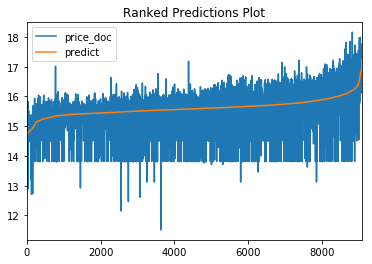

In [37]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [38]:
l = rf_model1.varimp()
FI = [i[0] for i in l[:50]]

In [39]:
print(FI)

['sub_area_Tencode', 'num_room', 'full_sq', 'life_sq', 'cafe_count_2000', 'sport_count_3000', 'cafe_count_3000', 'cafe_count_3000_price_1000', 'rel_kitch_sq', 'kitch_sq', 'nuclear_reactor_km', 'cafe_count_5000_price_high', 'cafe_count_5000_price_1000', 'max_floor', 'cafe_count_5000_price_1500', 'cafe_count_2000_price_1500', 'cafe_count_3000_price_2500', 'office_sqm_5000', 'cafe_count_3000_price_1500', 'cafe_count_2000_price_1000', 'sport_count_2000', 'bulvar_ring_km', 'cafe_count_5000', 'cafe_count_1500_price_2500', 'cafe_sum_5000_min_price_avg', 'timestamp', 'state', 'cafe_count_5000_price_2500', 'metro_min_avto', 'cafe_count_2000_price_2500', 'industrial_km', 'product_type_Tencode', 'prom_part_5000', 'material', 'trc_count_3000', 'ttk_km', 'year', 'cafe_sum_5000_max_price_avg', 'big_church_km', 'market_shop_km', 'workplaces_km', 'ts_km', 'build_year', 'basketball_km', 'catering_km', 'railroad_station_avto_km', 'public_healthcare_km', 'rel_life_sq', 'railroad_km', 'swim_pool_km']


### Create combination features

In [40]:
def feature_combiner(training_frame, test_frame, nums):
    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [41]:
train, _ = feature_combiner(train, test, FI)
valid, test = feature_combiner(valid, test, FI)

Combining: sub_area_Tencode (1/50) ...
Combining: num_room (2/50) ...
Combining: full_sq (3/50) ...
Combining: life_sq (4/50) ...
Combining: cafe_count_2000 (5/50) ...
Combining: sport_count_3000 (6/50) ...
Combining: cafe_count_3000 (7/50) ...
Combining: cafe_count_3000_price_1000 (8/50) ...
Combining: rel_kitch_sq (9/50) ...
Combining: kitch_sq (10/50) ...
Combining: nuclear_reactor_km (11/50) ...
Combining: cafe_count_5000_price_high (12/50) ...
Combining: cafe_count_5000_price_1000 (13/50) ...
Combining: max_floor (14/50) ...
Combining: cafe_count_5000_price_1500 (15/50) ...
Combining: cafe_count_2000_price_1500 (16/50) ...
Combining: cafe_count_3000_price_2500 (17/50) ...
Combining: office_sqm_5000 (18/50) ...
Combining: cafe_count_3000_price_1500 (19/50) ...
Combining: cafe_count_2000_price_1000 (20/50) ...
Combining: sport_count_2000 (21/50) ...
Combining: bulvar_ring_km (22/50) ...
Combining: cafe_count_5000 (23/50) ...
Combining: cafe_count_1500_price_2500 (24/50) ...
Combinin

In [42]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

#### Function to generate submission file

In [47]:
import re
import time

def gen_submission(preds, test=test):
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['id'].cbind(preds.exp())
    sub.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)
    return sub

### Native XGBoost

In [45]:

ave_y = train['price_doc'].mean()[0] ###

# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas data frames 
dtrain1 = xgb.DMatrix(train.as_data_frame()[encoded_combined_nums],
                      train.as_data_frame()['price_doc'], feature_names = encoded_combined_nums) ###
dvalid1 = xgb.DMatrix(valid.as_data_frame()[encoded_combined_nums],
                      valid.as_data_frame()['price_doc'], feature_names = encoded_combined_nums)
dtest = xgb.DMatrix(test.as_data_frame()[encoded_combined_nums], feature_names = encoded_combined_nums)



In [49]:
# tuning parameters
params1 = {
    'objective': 'reg:linear',
    'booster': 'gbtree', 
    'eval_metric': 'rmse',
    'eta': 0.005,
    'subsample': 0.1, 
    'colsample_bytree': 0.8,
    'max_depth': 5,
    'reg_alpha' : 0.007,
    'reg_lambda' : 0.0,
    'base_score': ave_y,
    'silent': 0,
    'seed': 12345,
}

# watchlist is used for early stopping
watchlist = [(dtrain1, 'train'), (dvalid1, 'eval')]

# train model
xgb_model1 = xgb.train(params1, 
                       dtrain1, 
                       10000,
                       evals=watchlist, 
                       early_stopping_rounds=50,   ###
                       verbose_eval=True)

num_boost_round = xgb_model1.best_iteration

# create assessment stats and submission file
#xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('SalePrice', valid, xgb_preds1_val) 
#xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
#gen_submission(xgb_preds1_test) 



[0]	train-rmse:0.599988	eval-rmse:0.611546
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:0.598816	eval-rmse:0.610512
[2]	train-rmse:0.597796	eval-rmse:0.609641
[3]	train-rmse:0.596706	eval-rmse:0.608727
[4]	train-rmse:0.595598	eval-rmse:0.607768
[5]	train-rmse:0.594567	eval-rmse:0.606843
[6]	train-rmse:0.593481	eval-rmse:0.605891
[7]	train-rmse:0.592335	eval-rmse:0.60489
[8]	train-rmse:0.591222	eval-rmse:0.6039
[9]	train-rmse:0.590236	eval-rmse:0.603027
[10]	train-rmse:0.589125	eval-rmse:0.602035
[11]	train-rmse:0.588151	eval-rmse:0.601156
[12]	train-rmse:0.587214	eval-rmse:0.600323
[13]	train-rmse:0.586236	eval-rmse:0.599471
[14]	train-rmse:0.585155	eval-rmse:0.598509
[15]	train-rmse:0.584167	eval-rmse:0.597625
[16]	train-rmse:0.583154	eval-rmse:0.59677
[17]	train-rmse:0.582108	eval-rmse:0.595813
[18]	train-rmse:0.581033	eval-rmse:0.594867
[19]	train-rmse:0.580011	eval-rmse:

In [ ]:

#stopping_rounds=20: train-rmse:0.437374
#0.34135 public leaderborad

In [48]:
xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('SalePrice', valid, xgb_preds1_val) 
xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
gen_submission(xgb_preds1_test)

id,price_doc
30474,5.35406e+06
30475,7.80288e+06
30476,5.39556e+06
30477,5.47273e+06
30478,5.00366e+06
30479,6.76249e+06
30480,4.66805e+06
30481,4.523e+06
30482,4.97569e+06
30483,4.98672e+06


### Random forest model

In [53]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    model_id = 'rf_model',
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)
gen_submission(rf_preds1_test) 

#  public leaderboard

H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1497836305429
    error_url = '/3/ModelBuilders/drf'
    msg = 'Illegal argument(s) for DRF model: rf_model.  Details: ERRR on field: _train: Missing training frame: py_104_sid_abc6'
    dev_msg = 'Illegal argument(s) for DRF model: rf_model.  Details: ERRR on field: _train: Missing training frame: py_104_sid_abc6'
    http_status = 412
    values = {'messages': [{'_log_level': 1, '_field_name': '_train', '_message': 'Missing training frame: py_104_sid_abc6'}], 'algo': 'DRF', 'parameters': {'_train': {'name': 'py_104_sid_abc6', 'type': 'Key'}, '_valid': {'name': 'py_107_sid_abc6', 'type': 'Key'}, '_nfolds': 3, '_keep_cross_validation_predictions': True, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_seed': 12345, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'AUTO', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': ['ecology', 'big_market_raion', 'culture_objects_top_25', 'detention_facility_raion', 'radiation_raion', 'big_road1_1line', 'product_type', 'oil_chemistry_raion', 'incineration_raion', 'railroad_terminal_raion', 'sub_area', 'nuclear_reactor_raion', 'railroad_1line', 'id', 'thermal_power_plant_raion', 'water_1line'], '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_is_cv_model': False, '_score_each_iteration': True, '_max_runtime_secs': 0.0, '_stopping_rounds': 50, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'price_doc', '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_ntrees': 10000, '_max_depth': 10, '_min_rows': 1.0, '_nbins': 20, '_nbins_cats': 1024, '_min_split_improvement': 1e-05, '_histogram_type': 'AUTO', '_r2_stopping': 1.7976931348623157e+308, '_nbins_top_level': 1024, '_build_tree_one_node': False, '_score_tree_interval': 0, '_initial_score_interval': 4000, '_score_interval': 4000, '_sample_rate': 0.8, '_sample_rate_per_class': None, '_calibrate_model': False, '_calibration_frame': None, '_col_sample_rate_change_per_level': 1.0, '_col_sample_rate_per_tree': 0.1, '_binomial_double_trees': False, '_mtries': -1}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for DRF model: rf_model.  Details: ERRR on field: _train: Missing training frame: py_104_sid_abc6'
    stacktrace =
        water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DRF model: rf_model.  Details: ERRR on field: _train: Missing training frame: py_104_sid_abc6
        water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
        hex.ModelBuilder.trainModel(ModelBuilder.java:198)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:53)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:16)
        water.api.RequestServer.serve(RequestServer.java:448)
        water.api.RequestServer.doGeneric(RequestServer.java:297)
        water.api.RequestServer.doPost(RequestServer.java:223)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:755)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:848)
        org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:684)
        org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:503)
        org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1086)
        org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:429)
        org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1020)
        org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:135)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        water.JettyHTTPD$LoginHandler.handle(JettyHTTPD.java:183)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        org.eclipse.jetty.server.Server.handle(Server.java:370)
        org.eclipse.jetty.server.AbstractHttpConnection.handleRequest(AbstractHttpConnection.java:494)
        org.eclipse.jetty.server.BlockingHttpConnection.handleRequest(BlockingHttpConnection.java:53)
        org.eclipse.jetty.server.AbstractHttpConnection.content(AbstractHttpConnection.java:982)
        org.eclipse.jetty.server.AbstractHttpConnection$RequestHandler.content(AbstractHttpConnection.java:1043)
        org.eclipse.jetty.http.HttpParser.parseNext(HttpParser.java:865)
        org.eclipse.jetty.http.HttpParser.parseAvailable(HttpParser.java:240)
        org.eclipse.jetty.server.BlockingHttpConnection.handle(BlockingHttpConnection.java:72)
        org.eclipse.jetty.server.bio.SocketConnector$ConnectorEndPoint.run(SocketConnector.java:264)
        org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:608)
        org.eclipse.jetty.util.thread.QueuedThreadPool$3.run(QueuedThreadPool.java:543)
        java.lang.Thread.run(Thread.java:748)
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'DRFParametersV3', 'schema_type': 'DRFParameters'}, 'model_id': None, 'training_frame': None, 'validation_frame': None, 'nfolds': 3, 'keep_cross_validation_predictions': True, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'AUTO', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'price_doc', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': ['ecology', 'big_market_raion', 'culture_objects_top_25', 'detention_facility_raion', 'radiation_raion', 'big_road1_1line', 'product_type', 'oil_chemistry_raion', 'incineration_raion', 'railroad_terminal_raion', 'sub_area', 'nuclear_reactor_raion', 'railroad_1line', 'id', 'thermal_power_plant_raion', 'water_1line'], 'ignore_const_cols': True, 'score_each_iteration': True, 'checkpoint': None, 'stopping_rounds': 50, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'max_hit_ratio_k': 0, 'ntrees': 10000, 'max_depth': 10, 'min_rows': 1.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'seed': 12345, 'build_tree_one_node': False, 'sample_rate': 0.8, 'sample_rate_per_class': None, 'col_sample_rate_per_tree': 0.1, 'col_sample_rate_change_per_level': 1.0, 'score_tree_interval': 0, 'min_split_improvement': 1e-05, 'histogram_type': 'AUTO', 'calibrate_model': False, 'calibration_frame': None, 'mtries': -1, 'binomial_double_trees': False}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'train', 'message': 'Missing training frame: py_104_sid_abc6'}]
    error_count = 2


### H2O Extremely random trees model

In [ ]:
# initialize extra trees model
ert_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345,
    histogram_type='random') # <- this is what makes it ERT instead of RF

# train ert model
ert_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information/create submission
print(ert_model1)
ert_preds1_val = ert_model1.predict(valid)
ranked_preds_plot('price_doc', valid, ert_preds1_val) # valid RMSE not so hot ...
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test) 

#  public leaderboard

### H2O GBM model

In [ ]:
# initialize H2O GBM
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# execute training
h2o_gbm_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_gbm_model)
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_gbm_preds1_val) # better validation error
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)
gen_submission(h2o_gbm_preds1_test) 

#  public leaderboard

### Train H2O stacked ensemble

In [ ]:
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid, 
                                    base_models=[rf_model1, ert_model1, 
                                                 h2o_gbm_model,])

stack.train(x=encoded_combined_nums,
            y='price_doc',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stack)
stack_preds1_val = stack.predict(valid)
ranked_preds_plot('price_doc', valid, stack_preds1_val) 
stack_preds1_test = stack.predict(test)
gen_submission(stack_preds1_test)

#### Shutdown H2O

In [54]:
# Shutdown H2O - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54323 (Y/N)? Y
H2O session _sid_ba6f closed.
